# Data Visualisation - Lab 1 - Getting Started

---

**Authors: Claire Rocks, Richard Kirk and Saif Anwar**

---


Welcome to the first lab for Data Visualisation.  Over the course of the labs we are going to build your toolkit for visualising data, processes and systems.  The labs are not exhaustive but they should give you a good start.  We strongly encourage you to access the wealth of resources on the internet and in the library.

## Setup for the lab
In this lab we are going to make sure you are set up using several python packages, the key ones being **Pandas**, **Seaborn** and **Matplotlib** for Data Visualisation.  We'll take you through a worked example and provide a task for you to work through at the end.

You might like to find out more about the libraries and what they can do by looking at the following links:
  * ```numpy``` - allows for advanced maths functions - [Link](https://numpy.org/)
  * ```pandas``` - allows for efficient data storage and manipulation - [Link](https://pandas.pydata.org/)
  * ```seaborn``` - allows for basic graph drawing - [Link](https://seaborn.pydata.org/index.html)
  * ```matplotlib``` - allows for greater plot manipulation - [Link](https://matplotlib.org/stable/plot_types/index.html)
  * ```scipy``` - allows for scientific functions and algorithms to be utilised - [Link](https://scipy.org/)

Let's start with installing the required libraries and importing them all.

In [17]:
# pip3 install numpy pandas seaborn matplotlib scipy

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

## Handling Data with Pandas DataFrame

The example we have chosen comes from [Ben Fry's Visualizing Data book (2008)](https://benfry.com/writing/) (the book PDF could be found [here](https://media.espora.org/mgoblin_media/media_entries/1633/Visualizing_Data.pdf)). It is a time series relating to milk, tea and coffee consumption in the United States between 1910 and 2004 inclusive. This might not seem the most exciting of examples, but because of its ubiquity and because it is a time series, is a great place to start when learning about visualisation.

The data is available at [here](http://benfry.com/writing/series/milk-tea-coffee.tsv).

To import ths data, we are using the `read_csv()` function to read this file into a **Pandas DataFrame**. A Pandas DataFrame is a 2 dimensional data structure, like a 2 dimensional array, or a table with rows and columns. We can also use the functions `read_excel()` and `read_json()` if the data is stored as an Excel file or a JSON file respectively. If the file has been downloaded, we can specify where it is stored rather than an external URL. In the code below, we have shown a CSV file could be loaded in through a URL and a local file. It should be noted that the data files should be put in the same directory as the Jupyter Notebook.

In [18]:
data_url="http://benfry.com/writing/series/milk-tea-coffee.tsv"  ## URL of the dataset

data_df = pd.read_csv(data_url, sep='\t')  ## We can read files from an URL straight into a pandas dataframe

## Alternatively, we can specify a filename (commented out for this example)
# filename="milk-tea-coffee.tsv"
# data_df = pd.read_csv(filename, sep='\t')

## Lets have a look at the first 5 rows of the data!
data_df.head()

Year  Milk   Tea  Coffee
0  1910  32.2   9.6    21.7
1  1911  31.3  10.2    19.7
2  1912  34.4   9.6    25.5
3  1913  33.1   8.5    21.2
4  1914  31.1   8.9    21.8

### Filter and Mine

We can observe the first few rows using the `head()` function.  We can also use the `tail()` function to see the last few rows.

As we can see, the dataset contains 3 columns: the first for milk, the second for coffee and the third for tea consumption in the United States from 1910 to 2004. We also store the year this data was collected. 

The values for *Milk*, *Tea* and *Coffee* are continuous variables which take real numbers as values.

#### `pd.DataFrame.shape`

It is often necessary to understand your data before planning your visualisation. We can count the total number of rows and columns using the shape function using the `shape` function. The first number denotes the number of rows and the second the number of columns.

In [19]:
## We can count the total number of rows and columns using the shape function 
data_df.shape

(95, 4)

#### `pd.DataFrame.describe`

We can also summarise the columns using the `describe()` function.  Note that if your data also include categorical variables (also called qualitative variables or attribute variables), we need to use the `include=object` parameter inside the describe function.

In [20]:
## We can also summarise the columns using the describe() function
data_df.describe()

## If we have categoric data, we need to use the following function
# data_df.describe(include=object)

Year       Milk        Tea     Coffee
count    95.000000  95.000000  95.000000  95.000000
mean   1957.000000  31.322105   7.063158  27.143158
std      27.568098   5.041196   1.258423   7.476056
min    1910.000000  21.200000   5.100000  15.300000
25%    1933.500000  27.350000   6.200000  19.450000
50%    1957.000000  32.700000   6.900000  27.900000
75%    1980.500000  33.950000   7.600000  30.850000
max    2004.000000  44.700000  11.300000  46.400000

#### `pd.DataFrame.info`

We can also use the `info()` method to obtain more information about the dataset. From the above, we can see the datatype (int64 and float64) of each column and the memory that the DataFrame occupies (3.1KB).  We can also see the number of rows (95) in the DataFrame.

In [21]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    95 non-null     int64  
 1   Milk    95 non-null     float64
 2   Tea     95 non-null     float64
 3   Coffee  95 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 3.1 KB


#### `pd.DataFrame.apply`

We can apply simple functions to a DataFrame column such as addition, subtraction, multiplication and so on.  We can also apply more complex functions e.g. rounding off to the nearest integer (`math.ceil`). More details can be seen by running `?pd.DataFrame.apply` in a Python block.

In [22]:
data_df['rounded_milk'] = data_df['Milk'].apply(math.ceil)
data_df.head()

Year  Milk   Tea  Coffee  rounded_milk
0  1910  32.2   9.6    21.7            33
1  1911  31.3  10.2    19.7            32
2  1912  34.4   9.6    25.5            35
3  1913  33.1   8.5    21.2            34
4  1914  31.1   8.9    21.8            32

Now that we have cleaned up some of the data, go back and re-run some of the previous Python code blocks. In each one, you will see the new column included!

#### `pd.DataFrame.drop`

If we have incorrectly added a column, or there is data that we don't need, we can delete it. This is referred to as `drop`ping data. Let's delete the previously created column...

In [23]:
data_df = data_df.drop(columns = ['rounded_milk'])
data_df.head()

Year  Milk   Tea  Coffee
0  1910  32.2   9.6    21.7
1  1911  31.3  10.2    19.7
2  1912  34.4   9.6    25.5
3  1913  33.1   8.5    21.2
4  1914  31.1   8.9    21.8

## Create a plot with **Pandas** and **Seaborn**

There are several plotting libraries in Python as described at the top of the lab. We are going to start with the **Pandas** and **Seaborn** libraries as they are useful, popular, easy to use and well documented. 

### Scatter plot

A scatter plot uses dots to represent values for two different numeric variables

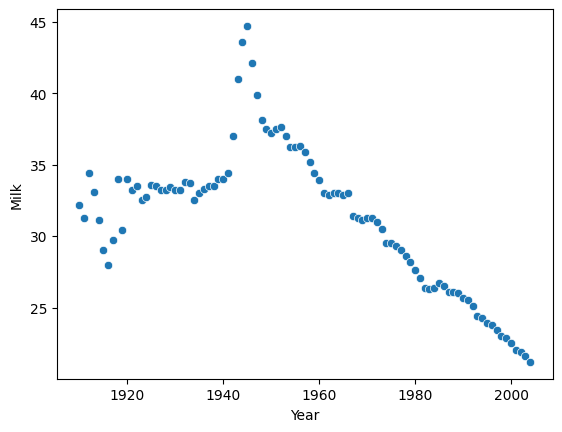

In [24]:
## Use Seaborn to plot a scatterplot
scat_plot = sns.scatterplot(x="Year", y="Milk", data=data_df)

### Refine the plot

We can now start to customise the chart. This includes (but by no means limited to):
  1. Changing the colour and the marker. Available markers include `'.'`, `'o'`, `'s'`, `'x' `and `'*'`
  2. Adding a title
  3. Defining the ticks and title for the x-axis
  4. Defining the ticks and title for the y-axis
  5. Adding a legend

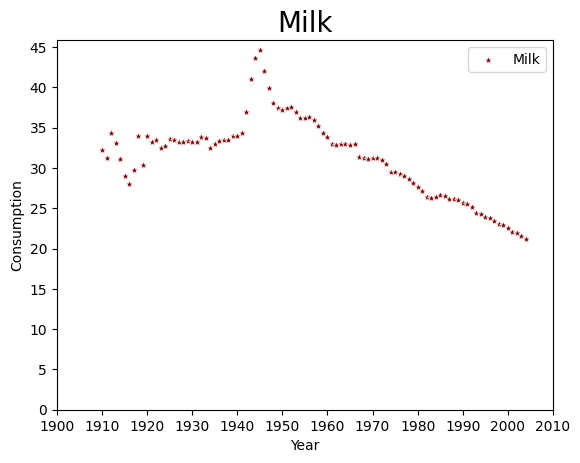

In [25]:
## Change the colour and the marker (1. from above)
scat_plot = sns.scatterplot(x="Year", y="Milk", data=data_df, marker='*',color="darkred")

## Give the plot a title (2. from above)
scat_plot.set_title("Milk", fontsize = 20)

## Set label on x axis (3a. from above)
scat_plot.set_xlabel("Year", fontsize = 10)

## Set the ticks on the x axis (3b. from above)
scat_plot.set_xticks(range(1900, 2011, 10))

## Set label on y axis (4a. from above)
scat_plot.set_ylabel("Consumption", fontsize = 10)

## Set the ticks on the y axis (4b. from above)
scat_plot.set_yticks(range(0, 50, 5))

## Add a legend (5. from above)
scat_plot.legend(labels=["Milk"])

Have a play with the above code, altering different elements and finding new ones of the visualisation!

### Line plot

Line plots plot y versus x as a line. Avalailable linestyles include `'-'`, `':'`, and `'--'`. All of the previous options are also available to be used.

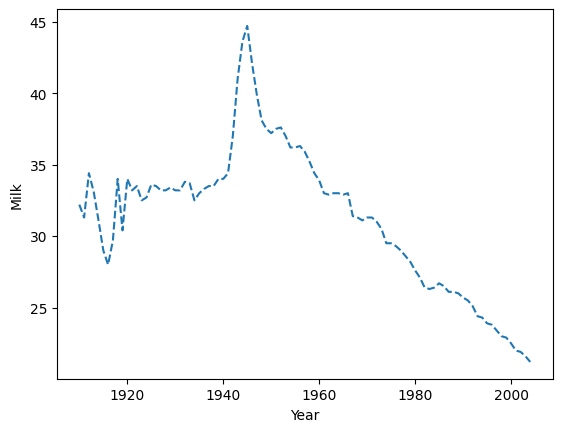

In [26]:
## Use Seaborn to draw a line plot
line_plot = sns.lineplot(x="Year", y="Milk", data=data_df, linestyle='--')

### Multiple line plots

Why have just one line when we can have multiple! To do this, we can simply call the `lineplot` function multiple times with different y axis, colours and line styles.

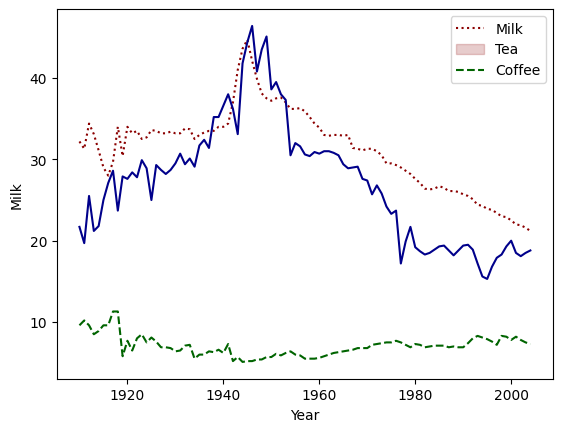

In [27]:
## Plot each line available
line_plot = sns.lineplot(x="Year", y="Milk", data=data_df, color='darkred', linestyle=':')
line_plot = sns.lineplot(x="Year", y="Tea", data=data_df, color='darkgreen', linestyle='--')
line_plot = sns.lineplot(x="Year", y="Coffee", data=data_df, color='darkblue', linestyle='-')

## Don't forget to the legend in order to make it easier to read
line_plot.legend(labels=["Milk", "Tea", "Coffee"])

### Multiple plots side by side

While it is good to have all the lines on one plot, it might be better to have them as 3 different graphs, like they are in `subplots`. In this case, we want 3 subplots, one for each attribute. We also want them to have the same x axis, so that they can be compared.

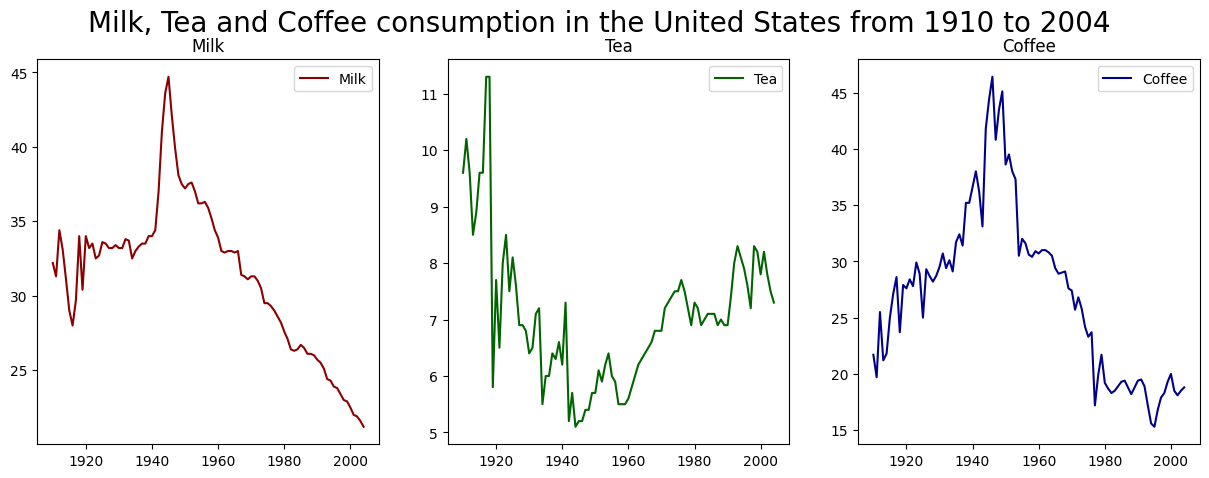

In [28]:
## Define the layout of our subplots
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(15, 5))
fig.suptitle('Milk, Tea and Coffee consumption in the United States from 1910 to 2004', fontsize=20)

## Specify the plot in the first window
axs[0].set_xticks(range(1900, 2010, 20))  ## Because `sharex=True`, this will be applied to all sub plots
axs[0].plot("Year", "Milk", data=data_df, color='darkred')
axs[0].set_title("Milk")
axs[0].legend()

## Specify the plot in the second window
axs[1].plot("Year", "Tea", data=data_df, color='darkgreen')
axs[1].set_title("Tea")
axs[1].legend()

## Specify the plot in the third window
axs[2].plot("Year", "Coffee", data=data_df, color='darkblue')
axs[2].set_title("Coffee")
axs[2].legend()

## Lets see what we produced...

### Saving your work

You can download your work as an *.ipynb* file to be shared. However, if we are putting it into a document or giving it to a colleague, we may want to save the figure as a separate image. To save a plot as a .png or .pdf, we can use the `savefig()` method.

In [29]:
fig.savefig('testplot.png')

## Exercise 1 - Fuel prices over time

The cost of fuel has been racing upwards, but sometimes it is hard to see by how much. Fortunately, the government has been collecting data and keeping track of this along with other related data, all to be published on the [data.gov.uk](https://data.gov.uk/) website. Therefore, lets build up a visualisation of the fuel prices.

### Part A - Loading data

Load in the data set from [here](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1082426/CSV_130622.csv) and explore the data to see what is contained within.

You may notice, when loading this file, that the titles are a bit difficult to read and parse. This is a fairly simple data set and so, while we could spend time figuring out the exact set of commands to run so that the data is formatted for us, we could just open the dataset in something like excel, edit the titles to be a single, readable, row and then save it as a new CSV. It can be easy when using code to think every problem has to be solved within your application - but sometimes a bit of external cleaning / editing can make things a lot easier. Therefore, download the CSV file from [here](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1082426/CSV_130622.csv), open in Excel (or a spreadsheet program of your choosing) and fix the headings of the file.

Load in the new, fixed data set and explore the data to see what is contained within and the differences between this and the original dataset.

In [30]:
## Exercise 1A code here! ##

### Part B - Creating a plot

Create and refine a simple plot using the data you examined in Part A.

In [31]:
## Exercise 1B code here! ##

## Exercise 2 - Creating your own visualisation

**Seaborn** has a large range of different plots that can be utilised, some of which you may have seen in previous modules. However, without an appropriate dataset, it is difficult to show all of these with just a single dataset. There are plenty of pre-prepared datasets out there that can be used, including from [data.gov.uk](https://data.gov.uk/), [Google Dataset Search](https://datasetsearch.research.google.com/) and [Kaggle](https://www.kaggle.com/datasets) to name but a few. Unlike Seaborn's datasets, these datasets may be difficult to handle as they may be constructed oddly or have invalid data. We will discuss how we can deal with some of these issues next week!

Find and load a dataset that is of interest to you and can be utilised easily. Once done, utilise this dataset within Seaborn to produce a visualisation representing it. You should explore different colours, sizes, plots and options as much as possible.

In [32]:
## Exercise 2 code here! ##